In [2]:
import numpy as np
import cv2 

from matplotlib import colors
import matplotlib.pyplot as plt
import colour


class ImageAnalysis:
    
    
    # rgb 表达方式转化
    def ColorDistribution2(image):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            modified_img = image.reshape(image.shape[0]*image.shape[1], 3)
            hexcolorlist=[]
            for i in range(len(modified_img)):
                #去掉黑色
                if (ImageAnalysis.rgb_to_hex(modified_img[i]) != "#000000"):
                    hexcolorlist.append(ImageAnalysis.rgb_to_hex(modified_img[i]))

            unique,counts=np.unique(hexcolorlist,return_counts=True)

            return (unique,counts)
        
    def rgb_to_hex(rgb_color):
        hex_color = "#"
        for i in rgb_color:
            num = int(i)
            #hex_color += ("{:02x}".format(i))
            hex_color += str(hex(num))[-2:].replace("x","0").upper()
        return hex_color
    
    def hex_to_rgb(hex):
        hex = hex.lstrip('#')
        r= int(hex[0:2],16)
        g= int(hex[2:4],16)
        b= int(hex[4:6],16)
        rgb = [r,g,b]
        return rgb

    def hexrgb2munsell(hex):
        rgb=ImageAnalysis.hex_to_rgb(hex)

        unitrgb=[]
        for element in rgb:
             unitrgb.append(element/255.0)

        XYZ = colour.sRGB_to_XYZ(unitrgb)
        xyY = colour.XYZ_to_xyY(XYZ)
        munsell = colour.xyY_to_munsell_colour(xyY)
        return munsell

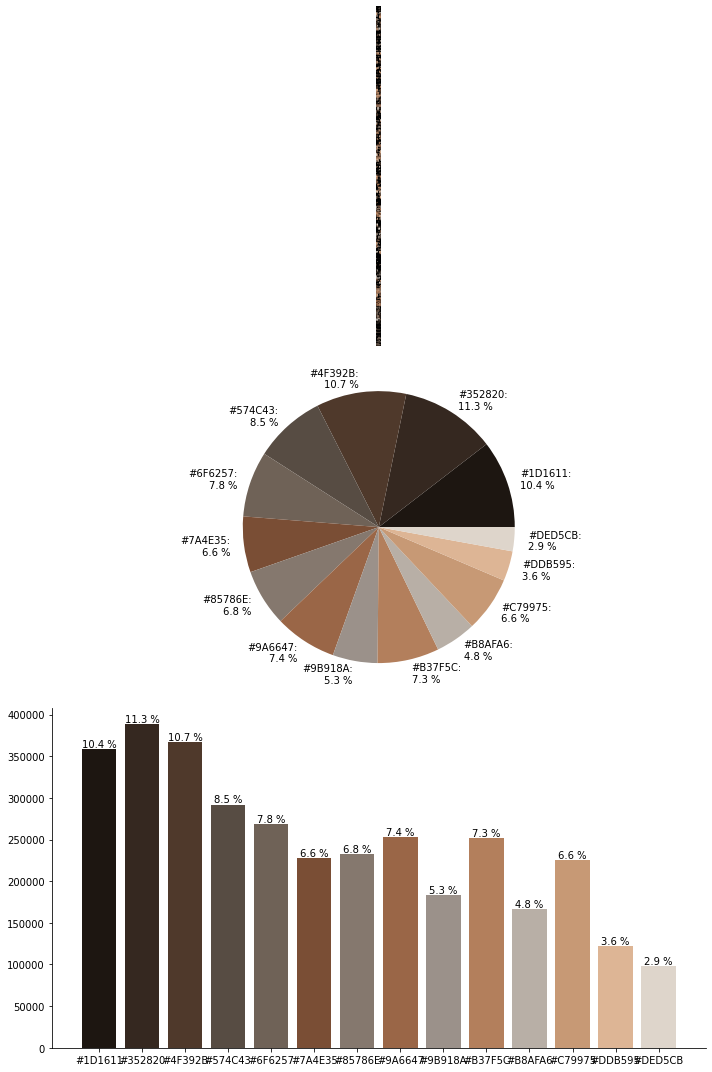

In [3]:
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread(r"E:\Downloads\BaiduNetdiskDownload\resultfile3\rusultImages.png")

hexcolorlist,counts=ImageAnalysis.ColorDistribution2(image)


percentages = counts / counts.sum() * 100

fig, ((ax1, ax2,ax3)) = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

ax1.imshow(image[:,:,::-1])
ax1.axis('off')

color_labels = [f'{label}:\n{perc:.1f} %' for label, perc in zip(hexcolorlist, percentages)]
ax2.pie(counts, labels=color_labels, colors=hexcolorlist)

bars = ax3.bar(hexcolorlist.astype(str), counts, color=hexcolorlist)
ax3.bar_label(bars, [f'{perc:.1f} %' for perc in percentages])
for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
